# MOSAIKS and Poverty at ADM0

In [1]:
import pickle
from pathlib import Path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import child_poverty_iraq.data.load_data as ld
import child_poverty_iraq.utils.constants as c

In [3]:
mosaiks_adm0 = ld.get_mosaiks_adm0()
print(mosaiks_adm0.shape)
mosaiks_adm0.head(2)

(170, 4001)


,shapeGroup,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3990,X_3991,X_3992,X_3993,X_3994,X_3995,X_3996,X_3997,X_3998,X_3999
0,AFG,0.222622,0.531475,0.063786,0.558549,0.347770,0.414391,0.065748,0.117015,0.503298,...,0.179174,0.093681,0.311995,0.209025,0.143233,0.705094,1.037524,0.282320,0.480521,0.046580
1,AGO,0.073747,0.295667,0.009288,0.367868,0.149731,0.149445,0.047871,0.049597,0.330519,...,0.100405,0.017546,0.096324,0.064604,0.059373,0.566319,0.616133,0.313304,0.425567,0.011851


In [4]:
pov_adm0 = ld.get_poverty_adm0()
print(pov_adm0.shape)
pov_adm0.head(2)


(85, 7)


,countrycode,survey,survey_round,year_chpov,nat_deprived_sev,nat_deprived_mod,popnational0017
0,AFG,DHS,71.0,2015.0,82.904877,93.396584,19895792.0
1,AGO,DHS,71.0,2015.0,61.446869,85.699501,17296062.0


In [5]:
adm0 = pd.merge(pov_adm0, mosaiks_adm0, how='left', left_on = 'countrycode', right_on = 'shapeGroup')
adm0.drop(columns=['shapeGroup'], inplace=True)
adm0

,countrycode,survey,survey_round,year_chpov,nat_deprived_sev,nat_deprived_mod,popnational0017,X_0,X_1,X_2,...,X_3990,X_3991,X_3992,X_3993,X_3994,X_3995,X_3996,X_3997,X_3998,X_3999
0,AFG,DHS,71.0,2015.0,82.904877,93.396584,19895792.0,0.222622,0.531475,0.063786,...,0.179174,0.093681,0.311995,0.209025,0.143233,0.705094,1.037524,0.282320,0.480521,0.046580
1,AGO,DHS,71.0,2015.0,61.446869,85.699501,17296062.0,0.073747,0.295667,0.009288,...,0.100405,0.017546,0.096324,0.064604,0.059373,0.566319,0.616133,0.313304,0.425567,0.011851
2,ALB,DHS,71.0,2017.0,11.400378,37.549000,586954.0,0.197297,0.394665,0.101576,...,0.359494,0.250784,0.737240,0.546693,0.303327,1.000271,1.748541,0.629306,0.585352,0.168945
3,ARG,MICS,6.0,2019.0,7.866027,32.405327,12736896.0,0.180103,0.397761,0.098309,...,0.425299,0.268014,0.683476,0.520747,0.375002,0.989549,1.697854,0.596290,0.619824,0.166678
4,ARM,DHS,71.0,2015.0,25.983221,44.689827,669476.0,0.208585,0.456551,0.113609,...,0.370705,0.259561,0.730577,0.561138,0.330180,1.019172,1.748160,0.606321,0.673980,0.170337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,VNM,MICS,6.0,2020.0,14.907916,38.696327,26156600.0,0.147926,0.331587,0.109341,...,0.230501,0.176488,0.583857,0.339396,0.166854,0.528185,1.529591,0.433318,0.296022,0.148563
81,YEM,DHS,61.0,2013.0,63.635624,88.444473,15118385.0,0.110580,0.317207,0.036307,...,0.112595,0.046675,0.213436,0.113386,0.071292,0.377194,0.894399,0.169512,0.236066,0.023561
82,ZAF,DHS,71.0,2016.0,41.231911,65.089928,19707538.0,0.235068,0.621307,0.066040,...,0.415347,0.158422,0.514649,0.392831,0.297425,1.347529,1.758243,0.808984,0.948729,0.096296
83,ZMB,DHS,71.0,2018.0,69.086517,90.830254,9560499.0,0.119241,0.392049,0.026967,...,0.184089,0.055225,0.231373,0.162034,0.120101,0.754797,1.068255,0.476734,0.521184,0.035100


# Shapefile for ADM0

In [52]:
import requests
import os


In [2]:
geom_adm0 = ld.get_geom_adm0()
print(geom_adm0.shape)
geom_adm0.head(2)

The file '../data/external/geoBoundariesCGAZ_ADM0.topojson' exists.
(198, 7)


,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,NaN,Cuba,CUB,CUB-ADM0-3_0_0-B1,CUB,ADM0,"MULTIPOLYGON (((-78.38430 20.53884, -78.38512 ..."
1,NaN,Denmark,DNK,DNK-ADM0-3_0_0-B1,DNK,ADM0,"MULTIPOLYGON (((11.19136 54.96003, 11.19308 54..."


In [6]:
# Add geometry
adm0 = pd.merge(adm0, geom_adm0[['shapeGroup', 'geometry']], how='left', left_on='countrycode', right_on='shapeGroup')
adm0 = gpd.GeoDataFrame(adm0)


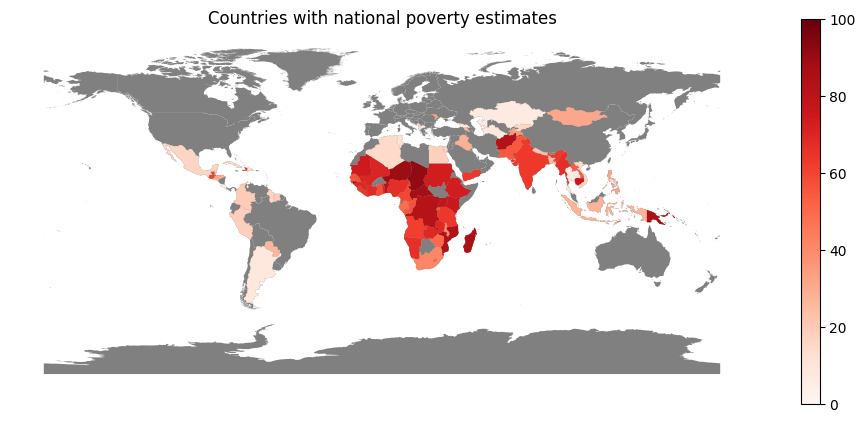

In [7]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')
# Plot countries with national poverty estimates
adm0.plot(ax=ax, column='nat_deprived_sev', cmap='Reds', legend=True, vmin=0, vmax=100)

plt.title('Severe National Poverty estimates')
plt.axis('off')
plt.show()


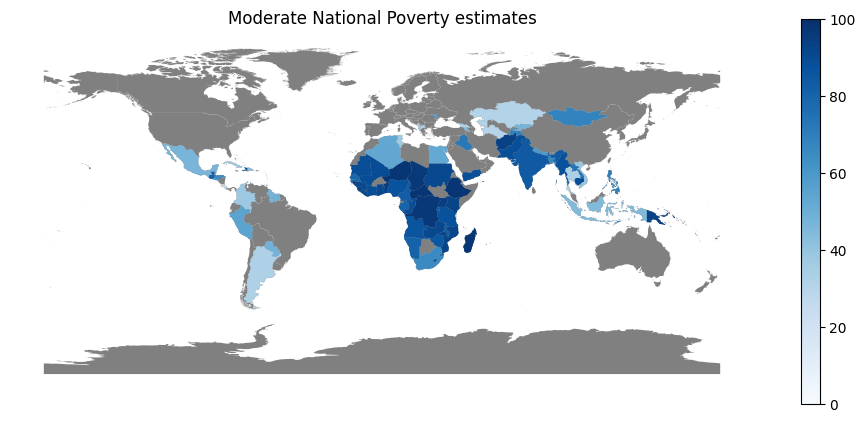

In [11]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')
# Plot countries with national poverty estimates
adm0.plot(ax=ax, column='nat_deprived_mod', cmap='Blues', legend=True, vmin=0, vmax=100)

plt.title('Moderate National Poverty estimates')
plt.axis('off')
plt.show()


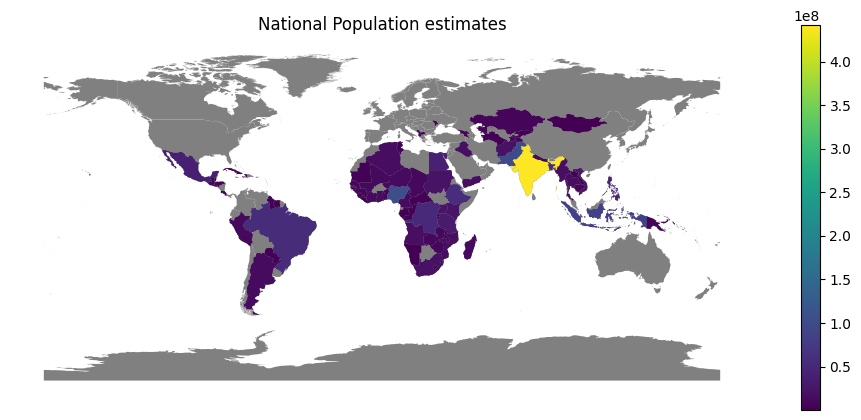

In [12]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')
# Plot countries with national poverty estimates
adm0.plot(ax=ax, column='popnational0017', cmap='viridis', legend=True)

plt.title('National Population estimates')
plt.axis('off')
plt.show()
